In [2]:
#Training Yet

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS=35
CHANNELS=3

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
shuffle = True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


2024-01-23 15:33:01.286881: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-23 15:33:01.286903: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-23 15:33:01.286910: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-23 15:33:01.286935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-23 15:33:01.286950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

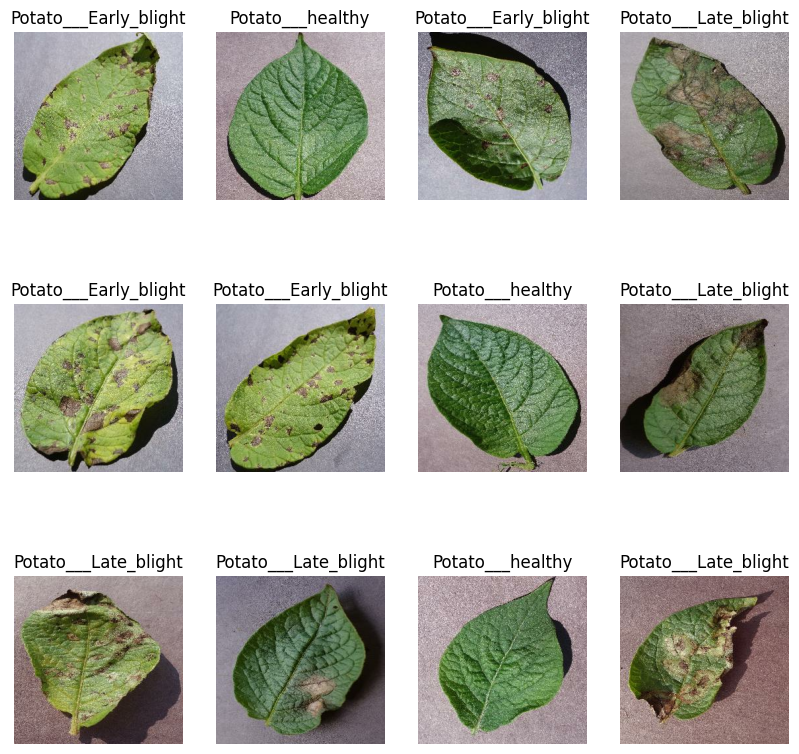

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')


In [8]:
len(dataset)

68

In [9]:
train_size= 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds= dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
def get_dataset_partitions_tf(ds,shuffle_size= 10000, train_split=0.8,val_split=0.1, test_split=0.1,shuffle=True):

    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)



    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(test_ds)

8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
#Filhall koi error nai aaya
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [27]:
history=model.fit(
    train_ds,
    epochs=35,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

2024-01-23 15:23:37.287372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:37.288360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.0252 - accuracy: 0.9929

2024-01-23 15:23:37.520209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:37.520533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.0241 - accuracy: 0.9932

2024-01-23 15:23:37.724669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:37.725095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.0239 - accuracy: 0.9935

2024-01-23 15:23:37.937009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:37.937513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.0231 - accuracy: 0.9937

2024-01-23 15:23:38.146336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:38.146851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9928

2024-01-23 15:23:38.355623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:38.356370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.0229 - accuracy: 0.9931

2024-01-23 15:23:38.564965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:38.565502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.0222 - accuracy: 0.9933

2024-01-23 15:23:38.793599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:38.794082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.0233 - accuracy: 0.9925

2024-01-23 15:23:38.999152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:38.999789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.0225 - accuracy: 0.9927

2024-01-23 15:23:39.212819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:39.213292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.0218 - accuracy: 0.9929

2024-01-23 15:23:39.437210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:39.437695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.0245 - accuracy: 0.9922

2024-01-23 15:23:39.678629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:39.706545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.0238 - accuracy: 0.9924

2024-01-23 15:23:39.912920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:39.913557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9926

2024-01-23 15:23:40.123488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:40.124292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.0229 - accuracy: 0.9929

2024-01-23 15:23:40.336816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:40.338251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.0225 - accuracy: 0.9931

2024-01-23 15:23:40.550970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:40.551610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.0226 - accuracy: 0.9932

2024-01-23 15:23:40.771795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:40.772515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.0220 - accuracy: 0.9934

2024-01-23 15:23:40.982466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:40.991263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.0215 - accuracy: 0.9936

2024-01-23 15:23:41.210586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:41.211263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.0275 - accuracy: 0.9930

2024-01-23 15:23:41.422143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:41.422914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.0275 - accuracy: 0.9924

2024-01-23 15:23:41.636281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:41.637237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.0269 - accuracy: 0.9926

2024-01-23 15:23:41.850092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:41.850645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.0264 - accuracy: 0.9927

2024-01-23 15:23:42.061371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:42.062115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.0258 - accuracy: 0.9929

2024-01-23 15:23:42.279522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:42.279793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.0260 - accuracy: 0.9924

2024-01-23 15:23:42.487854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:42.488559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.0259 - accuracy: 0.9925

2024-01-23 15:23:42.698294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:42.698811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9927

2024-01-23 15:23:42.906489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:42.906947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.0251 - accuracy: 0.9928

2024-01-23 15:23:43.114684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:43.115571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.0246 - accuracy: 0.9930

2024-01-23 15:23:43.323783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:43.324465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.0243 - accuracy: 0.9931

2024-01-23 15:23:43.531912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:43.532402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.0240 - accuracy: 0.9933

2024-01-23 15:23:43.737296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:43.738005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.0236 - accuracy: 0.9934

2024-01-23 15:23:43.961898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:43.962308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9935

2024-01-23 15:23:44.168794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:44.169325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 225ms/step - loss: 0.0283 - accuracy: 0.9925 - val_loss: 0.0356 - val_accuracy: 0.9792
Epoch 16/35


2024-01-23 15:23:44.689371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:44.689851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 10s - loss: 0.0385 - accuracy: 1.0000

2024-01-23 15:23:44.896860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:44.897494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.0223 - accuracy: 1.0000

2024-01-23 15:23:45.103948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:45.104703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.0150 - accuracy: 1.0000

2024-01-23 15:23:45.314625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:45.315051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.0172 - accuracy: 1.0000

2024-01-23 15:23:45.523451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:45.524201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.0176 - accuracy: 1.0000

2024-01-23 15:23:45.730419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:45.731382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 9s - loss: 0.0163 - accuracy: 1.0000 

2024-01-23 15:23:45.935148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:45.935811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 9s - loss: 0.0143 - accuracy: 1.0000

2024-01-23 15:23:46.141593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:46.142349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.0133 - accuracy: 1.0000

2024-01-23 15:23:46.366469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:46.366899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.0120 - accuracy: 1.0000

2024-01-23 15:23:46.575059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:46.575821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.0109 - accuracy: 1.0000

2024-01-23 15:23:46.783453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:46.784168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.0105 - accuracy: 1.0000

2024-01-23 15:23:46.992106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:46.992848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.0115 - accuracy: 1.0000

2024-01-23 15:23:47.294798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:47.295515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.0265 - accuracy: 0.9952

2024-01-23 15:23:47.511966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:47.512419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.0265 - accuracy: 0.9955

2024-01-23 15:23:47.725677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:47.726248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.0248 - accuracy: 0.9958

2024-01-23 15:23:47.939070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:47.939974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.0235 - accuracy: 0.9961

2024-01-23 15:23:48.149801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:48.150434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.0249 - accuracy: 0.9945

2024-01-23 15:23:48.360885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:48.361619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.0237 - accuracy: 0.9948

2024-01-23 15:23:48.569349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:48.569697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.0258 - accuracy: 0.9937

2024-01-23 15:23:48.797152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:48.797814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.000051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.000707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.0262 - accuracy: 0.9940

2024-01-23 15:23:49.210061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.210768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.0252 - accuracy: 0.9943

2024-01-23 15:23:49.420873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.421467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.0244 - accuracy: 0.9946

2024-01-23 15:23:49.634878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.635658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9948

2024-01-23 15:23:49.841638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:49.842237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.0245 - accuracy: 0.9950

2024-01-23 15:23:50.051476: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:50.052340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.0241 - accuracy: 0.9952

2024-01-23 15:23:50.264544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:50.265682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.0238 - accuracy: 0.9954

2024-01-23 15:23:50.473115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:50.473816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.0240 - accuracy: 0.9944

2024-01-23 15:23:50.687985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:50.688953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.0234 - accuracy: 0.9946

2024-01-23 15:23:50.897691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:50.898425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.0238 - accuracy: 0.9948

2024-01-23 15:23:51.112401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:51.113348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9950

2024-01-23 15:23:51.318344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:51.319070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.0236 - accuracy: 0.9951

2024-01-23 15:23:51.555301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:51.555749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9953

2024-01-23 15:23:51.769763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:51.770732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.0228 - accuracy: 0.9954

2024-01-23 15:23:51.977691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:51.978206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.0221 - accuracy: 0.9955

2024-01-23 15:23:52.187128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:52.187829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.0219 - accuracy: 0.9957

2024-01-23 15:23:52.396089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:52.396799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.0226 - accuracy: 0.9949

2024-01-23 15:23:52.608029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:52.608806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.0221 - accuracy: 0.9951

2024-01-23 15:23:52.814149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:52.814597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.0219 - accuracy: 0.9952

2024-01-23 15:23:53.041435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:53.041901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 2s - loss: 0.0215 - accuracy: 0.9953

2024-01-23 15:23:53.249693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:53.250146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.0210 - accuracy: 0.9954

2024-01-23 15:23:53.456651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:53.457054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.0206 - accuracy: 0.9955

2024-01-23 15:23:53.664990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:53.665744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.0204 - accuracy: 0.9956

2024-01-23 15:23:53.871203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:53.871877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.0206 - accuracy: 0.9957

2024-01-23 15:23:54.083687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:54.084419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.0203 - accuracy: 0.9958

2024-01-23 15:23:54.293475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:54.293959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.0199 - accuracy: 0.9959

2024-01-23 15:23:54.501374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:54.502194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.0195 - accuracy: 0.9960

2024-01-23 15:23:54.731569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:54.732148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.0191 - accuracy: 0.9961

2024-01-23 15:23:54.960020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:54.960378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.0187 - accuracy: 0.9962

2024-01-23 15:23:55.251228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:55.252271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9962

2024-01-23 15:23:55.467430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:55.468763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.0181 - accuracy: 0.9963

2024-01-23 15:23:55.697691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:55.698101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9964

2024-01-23 15:23:55.910032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:55.910470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9959

2024-01-23 15:23:56.122053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:56.122380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 222ms/step - loss: 0.0201 - accuracy: 0.9959 - val_loss: 0.0191 - val_accuracy: 0.9896
Epoch 17/35


2024-01-23 15:23:56.642640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:56.642960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 10s - loss: 0.0015 - accuracy: 1.0000

2024-01-23 15:23:56.848570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:56.849169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.0018 - accuracy: 1.0000

2024-01-23 15:23:57.057921: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:57.058732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.0212 - accuracy: 0.9896

2024-01-23 15:23:57.271187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:57.272180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.0208 - accuracy: 0.9922

2024-01-23 15:23:57.481147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:57.481608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.0279 - accuracy: 0.9875

2024-01-23 15:23:57.705052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:57.705061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.0301 - accuracy: 0.9844

2024-01-23 15:23:57.975595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:57.976658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.0262 - accuracy: 0.9866

2024-01-23 15:23:58.182181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:58.182837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.0230 - accuracy: 0.9883

2024-01-23 15:23:58.392092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:58.392504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.0205 - accuracy: 0.9896 

2024-01-23 15:23:58.608513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:58.608706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.0189 - accuracy: 0.9906

2024-01-23 15:23:58.819408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:58.819743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.0318 - accuracy: 0.9886

2024-01-23 15:23:59.033439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:59.034259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.0293 - accuracy: 0.9896

2024-01-23 15:23:59.254743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:59.255217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.0275 - accuracy: 0.9904

2024-01-23 15:23:59.471128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:59.471876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.0259 - accuracy: 0.9911

2024-01-23 15:23:59.689898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:59.690375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.0249 - accuracy: 0.9917

2024-01-23 15:23:59.899833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:23:59.900107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.0237 - accuracy: 0.9922

2024-01-23 15:24:00.126451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:00.126913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.0224 - accuracy: 0.9926

2024-01-23 15:24:00.365525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:00.365895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.0216 - accuracy: 0.9931

2024-01-23 15:24:00.577188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:00.577619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.0231 - accuracy: 0.9918

2024-01-23 15:24:00.787059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:00.787886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.0224 - accuracy: 0.9922

2024-01-23 15:24:01.013427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:01.013645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.0220 - accuracy: 0.9926

2024-01-23 15:24:01.224216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:01.224708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.0212 - accuracy: 0.9929

2024-01-23 15:24:01.440138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:01.441176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.0210 - accuracy: 0.9932

2024-01-23 15:24:01.654973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:01.655467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.0203 - accuracy: 0.9935

2024-01-23 15:24:01.864752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:01.865430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.0197 - accuracy: 0.9937

2024-01-23 15:24:02.074402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:02.074864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.0191 - accuracy: 0.9940

2024-01-23 15:24:02.313729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:02.314172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.0197 - accuracy: 0.9931

2024-01-23 15:24:02.518722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:02.519421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.0193 - accuracy: 0.9933

2024-01-23 15:24:02.727159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:02.727858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.0188 - accuracy: 0.9935

2024-01-23 15:24:02.932030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:02.932715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.0184 - accuracy: 0.9937

2024-01-23 15:24:03.145946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:03.146613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 4s - loss: 0.0179 - accuracy: 0.9940

2024-01-23 15:24:03.355614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:03.356447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.0176 - accuracy: 0.9941

2024-01-23 15:24:03.562523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:03.563086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9943

2024-01-23 15:24:03.769943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:03.770606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.0169 - accuracy: 0.9945

2024-01-23 15:24:03.978090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:03.978563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.0164 - accuracy: 0.9946

2024-01-23 15:24:04.189627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:04.190149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.0180 - accuracy: 0.9939

2024-01-23 15:24:04.400244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:04.400727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.0175 - accuracy: 0.9941

2024-01-23 15:24:04.624490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:04.625222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9942

2024-01-23 15:24:04.830538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:04.831236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9944

2024-01-23 15:24:05.039643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:05.040346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.0169 - accuracy: 0.9945

2024-01-23 15:24:05.249576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:05.250075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.0179 - accuracy: 0.9939

2024-01-23 15:24:05.462136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:05.462758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.0175 - accuracy: 0.9940

2024-01-23 15:24:05.676935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:05.677907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.0186 - accuracy: 0.9935

2024-01-23 15:24:05.882192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:05.882703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.0183 - accuracy: 0.9936

2024-01-23 15:24:06.097623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:06.098931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9937

2024-01-23 15:24:06.307398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:06.308047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.0218 - accuracy: 0.9932

2024-01-23 15:24:06.515968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:06.516906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.0214 - accuracy: 0.9934

2024-01-23 15:24:06.741299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:06.742233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.0214 - accuracy: 0.9935

2024-01-23 15:24:06.949066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:06.949531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.0216 - accuracy: 0.9930

2024-01-23 15:24:07.158211: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:07.158670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9931

2024-01-23 15:24:07.367921: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:07.368590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.0235 - accuracy: 0.9926

2024-01-23 15:24:07.580336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:07.581236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9928

2024-01-23 15:24:07.790299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:07.790965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9929

2024-01-23 15:24:07.999088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:07.999864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 220ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0391 - val_accuracy: 0.9896
Epoch 18/35


2024-01-23 15:24:08.518343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:08.518889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 11s - loss: 0.0060 - accuracy: 1.0000

2024-01-23 15:24:08.727924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:08.728378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.0043 - accuracy: 1.0000

2024-01-23 15:24:08.938299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:08.938779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 0.0077 - accuracy: 1.0000

2024-01-23 15:24:09.162505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:09.162834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.0073 - accuracy: 1.0000

2024-01-23 15:24:09.380383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:09.381488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.0067 - accuracy: 1.0000

2024-01-23 15:24:09.592225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:09.592947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.0056 - accuracy: 1.0000

2024-01-23 15:24:09.805388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:09.813038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.0054 - accuracy: 1.0000

2024-01-23 15:24:10.012482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:10.013223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.0092 - accuracy: 0.9961 

2024-01-23 15:24:10.222121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:10.222919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.0082 - accuracy: 0.9965

2024-01-23 15:24:10.430695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:10.431319: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.0077 - accuracy: 0.9969

2024-01-23 15:24:10.728933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:10.729358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.0070 - accuracy: 0.9972

2024-01-23 15:24:10.939591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:10.940353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.0070 - accuracy: 0.9974

2024-01-23 15:24:11.166469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:11.166906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.0073 - accuracy: 0.9976

2024-01-23 15:24:11.398063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:11.398614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.0092 - accuracy: 0.9955

2024-01-23 15:24:11.603439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:11.604152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.0086 - accuracy: 0.9958

2024-01-23 15:24:11.815989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:11.816959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.0088 - accuracy: 0.9961

2024-01-23 15:24:12.037668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:12.038428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.0086 - accuracy: 0.9963

2024-01-23 15:24:12.242987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:12.243712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.0087 - accuracy: 0.9965

2024-01-23 15:24:12.459119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:12.459897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.0083 - accuracy: 0.9967

2024-01-23 15:24:12.690069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:12.690474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.0079 - accuracy: 0.9969

2024-01-23 15:24:12.904557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:12.905320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.0089 - accuracy: 0.9955

2024-01-23 15:24:13.144182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:13.144494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.0085 - accuracy: 0.9957

2024-01-23 15:24:13.349505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:13.350252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.0086 - accuracy: 0.9959

2024-01-23 15:24:13.562265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:13.562674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.0083 - accuracy: 0.9961

2024-01-23 15:24:13.773676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:13.774032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9950

2024-01-23 15:24:13.982843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:13.983456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.0122 - accuracy: 0.9952

2024-01-23 15:24:14.203572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:14.203904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.0119 - accuracy: 0.9954

2024-01-23 15:24:14.424490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:14.425121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.0116 - accuracy: 0.9955

2024-01-23 15:24:14.643118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:14.643577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.0113 - accuracy: 0.9957

2024-01-23 15:24:14.874759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:14.875374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.0110 - accuracy: 0.9958

2024-01-23 15:24:15.080675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:15.081533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.0107 - accuracy: 0.9960

2024-01-23 15:24:15.291159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:15.291627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.0104 - accuracy: 0.9961

2024-01-23 15:24:15.511389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:15.511598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.0107 - accuracy: 0.9962

2024-01-23 15:24:15.721319: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:15.721980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.0104 - accuracy: 0.9963

2024-01-23 15:24:15.936453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:15.936562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.0103 - accuracy: 0.9964

2024-01-23 15:24:16.152566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:16.152682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.0104 - accuracy: 0.9965

2024-01-23 15:24:16.358097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:16.358615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.0105 - accuracy: 0.9966

2024-01-23 15:24:16.589270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:16.589606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.0103 - accuracy: 0.9967

2024-01-23 15:24:16.800219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:16.800954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.0101 - accuracy: 0.9968

2024-01-23 15:24:17.014350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:17.014780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.0108 - accuracy: 0.9969

2024-01-23 15:24:17.233500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:17.234195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.0106 - accuracy: 0.9970

2024-01-23 15:24:17.444856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:17.445576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.0109 - accuracy: 0.9970

2024-01-23 15:24:17.656546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:17.657275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.0106 - accuracy: 0.9971

2024-01-23 15:24:17.876605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:17.877009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.0105 - accuracy: 0.9972

2024-01-23 15:24:18.091263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:18.092466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.0173 - accuracy: 0.9965

2024-01-23 15:24:18.318538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:18.318958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.0183 - accuracy: 0.9959

2024-01-23 15:24:18.537877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:18.538286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9960

2024-01-23 15:24:18.766067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:18.766517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.0188 - accuracy: 0.9954

2024-01-23 15:24:18.975168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:18.975510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.0185 - accuracy: 0.9955

2024-01-23 15:24:19.196113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:19.196543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9956

2024-01-23 15:24:19.406294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:19.406727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9957

2024-01-23 15:24:19.615340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:19.616048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.0223 - accuracy: 0.9952

2024-01-23 15:24:19.848340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:19.848625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9947

2024-01-23 15:24:20.065131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:20.065783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 224ms/step - loss: 0.0257 - accuracy: 0.9948 - val_loss: 0.0650 - val_accuracy: 0.9844
Epoch 19/35
 1/54 [..............................] - ETA: 10s - loss: 0.0288 - accuracy: 1.0000

2024-01-23 15:24:20.613760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:20.614201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:20.816503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:20.816851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.0260 - accuracy: 1.0000

2024-01-23 15:24:21.026787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:21.027523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 12s - loss: 0.0198 - accuracy: 1.0000

2024-01-23 15:24:21.299027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:21.299804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 11s - loss: 0.0156 - accuracy: 1.0000

2024-01-23 15:24:21.529761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:21.530152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 11s - loss: 0.0208 - accuracy: 1.0000

2024-01-23 15:24:21.742915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:21.743735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 11s - loss: 0.0181 - accuracy: 1.0000

2024-01-23 15:24:21.964362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:21.964856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.0274 - accuracy: 0.9955

2024-01-23 15:24:22.209246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:22.209761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.0284 - accuracy: 0.9961

2024-01-23 15:24:22.416439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:22.416706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 10s - loss: 0.0262 - accuracy: 0.9965

2024-01-23 15:24:22.632129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:22.633024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.0349 - accuracy: 0.9906 

2024-01-23 15:24:22.859681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:22.860133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.0375 - accuracy: 0.9886

2024-01-23 15:24:23.067297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:23.067429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.0353 - accuracy: 0.9896

2024-01-23 15:24:23.284310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:23.285589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.0333 - accuracy: 0.9904

2024-01-23 15:24:23.511150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:23.511562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 9s - loss: 0.0316 - accuracy: 0.9911

2024-01-23 15:24:23.797056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:23.797429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.0296 - accuracy: 0.9917

2024-01-23 15:24:24.023715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:24.024046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.0319 - accuracy: 0.9902

2024-01-23 15:24:24.257559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:24.258224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.0301 - accuracy: 0.9908

2024-01-23 15:24:24.475506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:24.476078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 0.0288 - accuracy: 0.9913

2024-01-23 15:24:24.710786: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:24.711411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 8s - loss: 0.0274 - accuracy: 0.9918

2024-01-23 15:24:24.940770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:24.941175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.0264 - accuracy: 0.9922

2024-01-23 15:24:25.168598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:25.168626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.0255 - accuracy: 0.9926

2024-01-23 15:24:25.385945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:25.387293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.0243 - accuracy: 0.9929

2024-01-23 15:24:25.600619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:25.601791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 7s - loss: 0.0234 - accuracy: 0.9932

2024-01-23 15:24:25.846318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:25.846577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9922

2024-01-23 15:24:26.063049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:26.064114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.0240 - accuracy: 0.9925

2024-01-23 15:24:26.277955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:26.278843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.0242 - accuracy: 0.9916

2024-01-23 15:24:26.514830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:26.515102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 6s - loss: 0.0235 - accuracy: 0.9919

2024-01-23 15:24:26.753481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:26.754070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.0227 - accuracy: 0.9922

2024-01-23 15:24:26.975764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:26.976150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.0220 - accuracy: 0.9925

2024-01-23 15:24:27.198442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:27.199092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.0215 - accuracy: 0.9927

2024-01-23 15:24:27.424682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:27.424901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.0209 - accuracy: 0.9929

2024-01-23 15:24:27.646126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:27.647222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 5s - loss: 0.0203 - accuracy: 0.9932

2024-01-23 15:24:27.908005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:27.908345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.0198 - accuracy: 0.9934

2024-01-23 15:24:28.138938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:28.139365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.0196 - accuracy: 0.9936

2024-01-23 15:24:28.362079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:28.362500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.0191 - accuracy: 0.9937

2024-01-23 15:24:28.613884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:28.614394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 4s - loss: 0.0186 - accuracy: 0.9939

2024-01-23 15:24:28.826630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:28.827098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.0181 - accuracy: 0.9941

2024-01-23 15:24:29.059832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:29.060102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.0176 - accuracy: 0.9942

2024-01-23 15:24:29.288467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:29.288788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.0191 - accuracy: 0.9936

2024-01-23 15:24:29.525486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:29.525965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.0187 - accuracy: 0.9937

2024-01-23 15:24:29.733049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:29.733995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.0182 - accuracy: 0.9939

2024-01-23 15:24:29.953050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:29.954116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.0178 - accuracy: 0.9940

2024-01-23 15:24:30.181045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:30.181640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.0202 - accuracy: 0.9935

2024-01-23 15:24:30.395818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:30.397206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.0198 - accuracy: 0.9936

2024-01-23 15:24:30.614335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:30.615667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 2s - loss: 0.0193 - accuracy: 0.9937

2024-01-23 15:24:30.857406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:30.858117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.0189 - accuracy: 0.9939

2024-01-23 15:24:31.072724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:31.073035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.0188 - accuracy: 0.9940

2024-01-23 15:24:31.294588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:31.294983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.0194 - accuracy: 0.9941

2024-01-23 15:24:31.513687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:31.515181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.0193 - accuracy: 0.9943

2024-01-23 15:24:31.726714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:31.727292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.0189 - accuracy: 0.9944

2024-01-23 15:24:31.944679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:31.944897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9945

2024-01-23 15:24:32.163187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:32.163720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9946

2024-01-23 15:24:32.426317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:32.426839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9947

2024-01-23 15:24:32.642950: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:32.643936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 13s 234ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.1203 - val_accuracy: 0.9740
Epoch 20/35


2024-01-23 15:24:33.220672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:33.221041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 12s - loss: 0.0097 - accuracy: 1.0000

2024-01-23 15:24:33.459688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:33.460573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 11s - loss: 0.0051 - accuracy: 1.0000

2024-01-23 15:24:33.678929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:33.680301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 0.0116 - accuracy: 0.9896

2024-01-23 15:24:33.897779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:33.897972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 11s - loss: 0.0088 - accuracy: 0.9922

2024-01-23 15:24:34.137761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:34.138235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.0071 - accuracy: 0.9937

2024-01-23 15:24:34.354121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:34.355074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.0060 - accuracy: 0.9948

2024-01-23 15:24:34.567882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:34.568353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.0052 - accuracy: 0.9955

2024-01-23 15:24:34.784986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:34.784982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.0096 - accuracy: 0.9922

2024-01-23 15:24:34.992034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:34.992442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.0088 - accuracy: 0.9931 

2024-01-23 15:24:35.207548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:35.208059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.0137 - accuracy: 0.9906

2024-01-23 15:24:35.435955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:35.436737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.0124 - accuracy: 0.9915

2024-01-23 15:24:35.721664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:35.722185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.0128 - accuracy: 0.9922

2024-01-23 15:24:35.962976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:35.963837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.0131 - accuracy: 0.9928

2024-01-23 15:24:36.225312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:36.225790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 9s - loss: 0.0122 - accuracy: 0.9933

2024-01-23 15:24:36.460373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:36.460804: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 9s - loss: 0.0122 - accuracy: 0.9937

2024-01-23 15:24:36.710773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:36.711090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.0125 - accuracy: 0.9941

2024-01-23 15:24:36.947825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:36.949306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.0157 - accuracy: 0.9926

2024-01-23 15:24:37.192000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:37.192423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 0.0153 - accuracy: 0.9931

2024-01-23 15:24:37.409029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:37.410205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9934

2024-01-23 15:24:37.632313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:37.632598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9937

2024-01-23 15:24:37.842377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:37.842811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.0187 - accuracy: 0.9926

2024-01-23 15:24:38.063605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:38.064174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.0206 - accuracy: 0.9915

2024-01-23 15:24:38.274785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:38.275327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 7s - loss: 0.0253 - accuracy: 0.9905

2024-01-23 15:24:38.485152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-23 15:24:38.485766: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

In [28]:
model.evaluate(test_ds)

8/8 [==============================] - 1s 97ms/step - loss: 0.1154 - accuracy: 0.9648


[0.11537031829357147, 0.96484375]

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

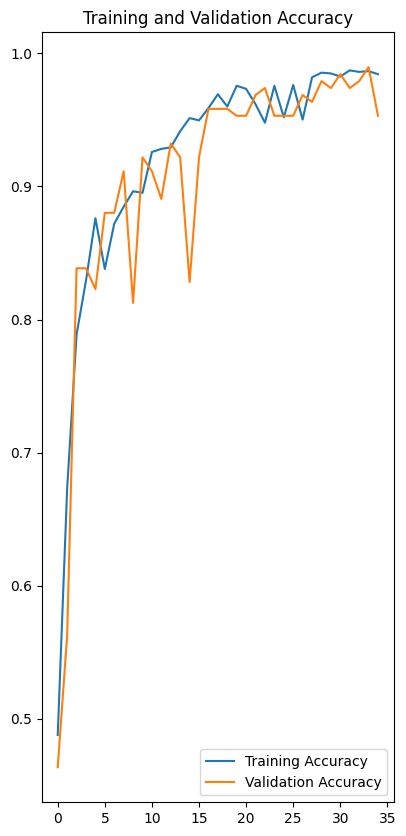

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(35), acc,label='Training Accuracy')
plt.plot(range(35), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

[[[134 122 126]
  [131 119 123]
  [134 122 126]
  ...
  [155 144 150]
  [149 138 144]
  [150 139 145]]

 [[121 109 113]
  [120 108 112]
  [131 119 123]
  ...
  [152 141 147]
  [159 148 154]
  [168 157 163]]

 [[130 118 122]
  [122 110 114]
  [128 116 120]
  ...
  [148 137 143]
  [161 150 156]
  [172 161 167]]

 ...

 [[112 101 109]
  [117 106 114]
  [112 101 109]
  ...
  [145 135 144]
  [150 140 149]
  [150 140 149]]

 [[125 114 122]
  [131 120 128]
  [118 107 115]
  ...
  [146 136 145]
  [147 137 146]
  [144 134 143]]

 [[101  90  98]
  [120 109 117]
  [119 108 116]
  ...
  [143 133 142]
  [140 130 139]
  [134 124 133]]]


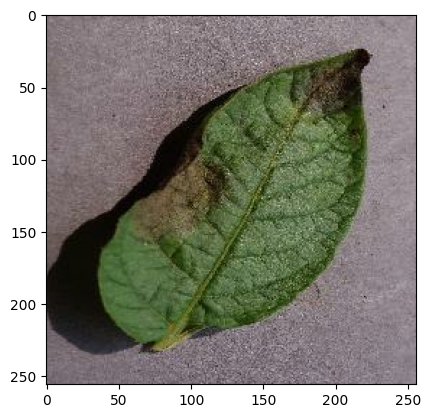

In [33]:
for image_batch, label_batch in test_ds.take(1):

    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print(image_batch[0].numpy().astype('uint8'))

In [34]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence= round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


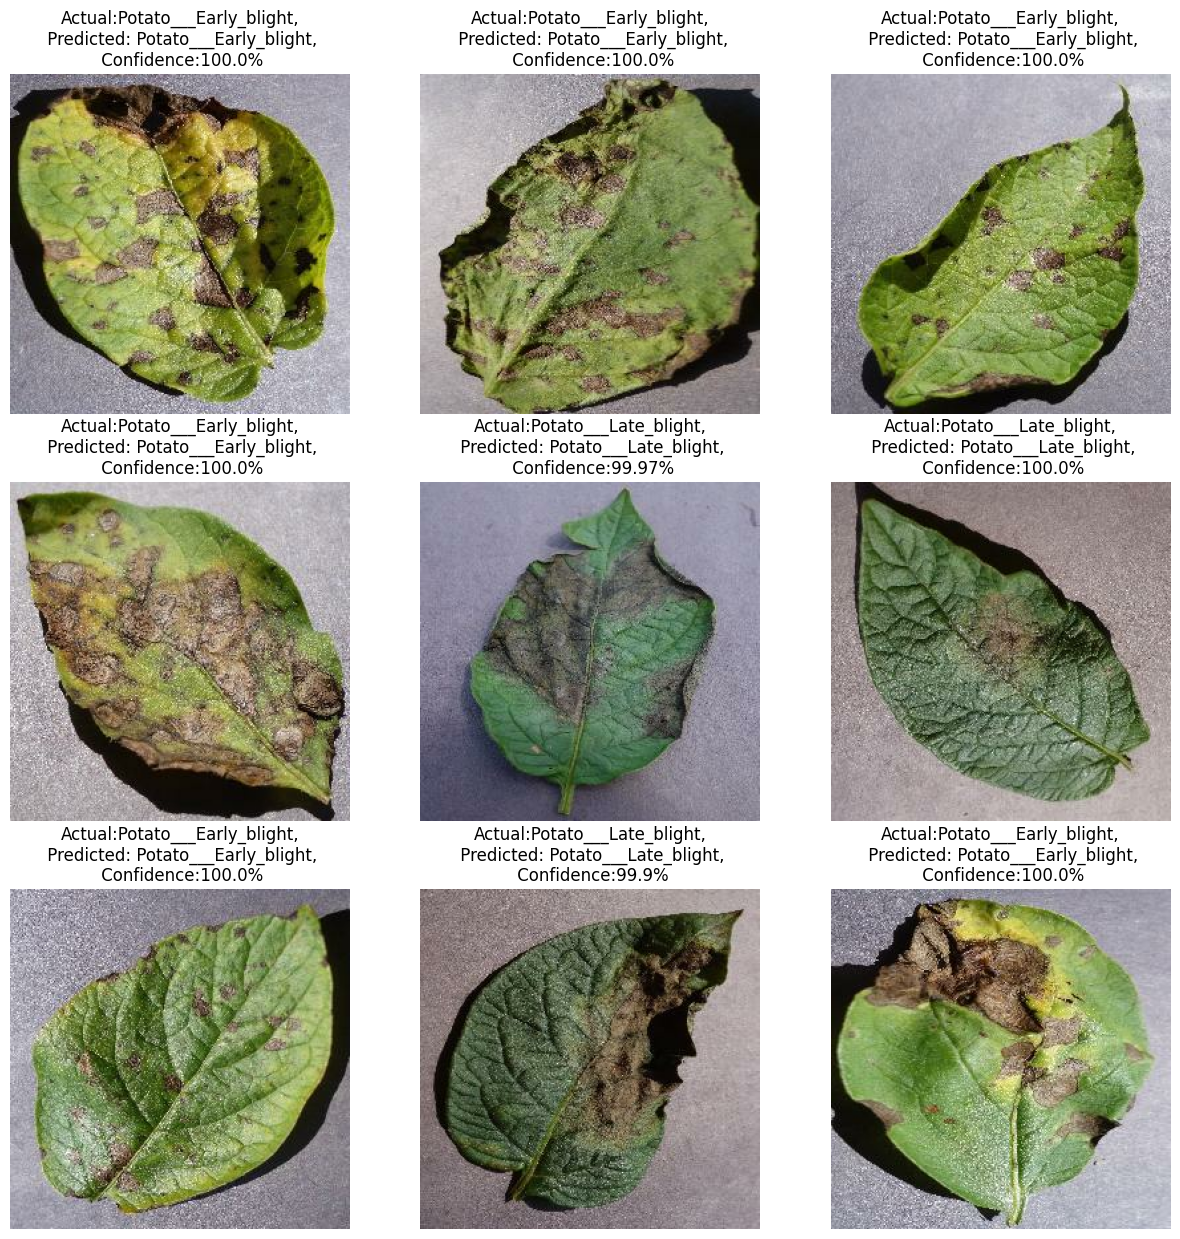

In [35]:
plt.figure(figsize=(15,15))
for image, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, image[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f'Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}%')
        plt.axis('off')

In [37]:
import os
import re

# Assuming 'model' is your trained model
model_directory = '../models'

# List all files in the '../models' directory
files = os.listdir(model_directory)

# Filter out non-integer file names and convert the rest to integers
model_versions = [int(i) for i in files if i.isdigit()]

# Find the maximum version or default to 0 if no versions exist
max_version = max(model_versions) if model_versions else 0

# Increment the maximum version to get the new version
model_version = max_version + 1

# Create a directory for the new model version
model_dir = f'{model_directory}/{model_version}'
os.makedirs(model_dir, exist_ok=True)

# Save the model using the SavedModel format
model.save(model_dir)

print(f"Model version {model_version} saved at: {model_dir}")


INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


Model version 1 saved at: ../models/1
